Q1

In [ ]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
urls = [
    "https://www.bbc.com/news/world-60525350",
    "https://www.bbc.com/news/world-us-canada-61409461",
    "https://www.bbc.com/news/world-europe-60506682",
    "https://www.bbc.com/news/technology-61470921",
    "https://www.bbc.com/news/science-environment-61473213"
]

def analyze_page(url):
    try:
        response = requests.get(url, timeout=10)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        text_length = len(soup.get_text(strip=True))
        links = soup.find_all('a', href=True)
        outgoing_links = len([a for a in links if a['href'].startswith('http')])
        is_dynamic = 'ajax' in html.lower() or bool(soup.find_all('script', src=True))

        return {
            'URL': url,
            'TextLength': text_length,
            'OutgoingLinks': outgoing_links,
            'IsDynamic': is_dynamic
        }
    except Exception as e:
        return {'URL': url, 'Error': str(e)}
results = [analyze_page(url) for url in urls]
df = pd.DataFrame(results)
print(df)
df.to_csv("bbc_analysis.csv", index=False)


                                                 URL  TextLength  \
0            https://www.bbc.com/news/world-60525350        6969   
1  https://www.bbc.com/news/world-us-canada-61409461        3262   
2     https://www.bbc.com/news/world-europe-60506682       10415   
3       https://www.bbc.com/news/technology-61470921        3262   
4  https://www.bbc.com/news/science-environment-6...         428   

   OutgoingLinks  IsDynamic  
0             17       True  
1             16       True  
2             22       True  
3             16       True  
4             17      False  


In [ ]:
print("میانگین طول متن:", df['TextLength'].mean())
print("کمینه طول متن:", df['TextLength'].min())
print("بیشینه طول متن:", df['TextLength'].max())

print("میانگین لینک خروجی:", df['OutgoingLinks'].mean())
print("کم‌ترین لینک:", df['OutgoingLinks'].min())
print("بیشترین لینک:", df['OutgoingLinks'].max())


میانگین طول متن: 4867.2
کمینه طول متن: 428
بیشینه طول متن: 10415
میانگین لینک خروجی: 17.6
کم‌ترین لینک: 16
بیشترین لینک: 22


Q2

In [ ]:
import re
from collections import Counter
sample_text = """
Tara is a computer engineering student at Iran University of Science and Technology.
Tara is passionate about coding and spends most of her time learning new programming languages.
In group projects, Tara often takes the lead because Tara is excellent at managing time and coordinating tasks.
Professors often praise Tara for her dedication and attention to detail.
Tara also enjoys creating educational content about coding, and many students benefit from Tara’s tutorials.
Tara’s goal is to become a professional developer in the field of artificial intelligence.
With Tara’s determination and hard work, there’s no doubt that Tara will achieve great success in the tech industry.
"""

def keyword_stuffing(text):
    words = re.findall(r'\b\w+\b', text.lower())

    if not words:
        return "The text does not contain any words."

    total_words = len(words)
    word_counts = Counter(words)
    most_common_word, freq = word_counts.most_common(1)[0]
    ratio = freq / total_words

    result = f"Most frequent word: '{most_common_word}'\n"
    result += f"Frequency: {freq} / Total words: {total_words} → Ratio = {ratio:.2f}\n"

    if ratio > 0.15:
        result += "Result: This paragraph is likely using Keyword Stuffing (tagged as 'Stuffed').\n"
        result += "Reason: The frequency of the word exceeds 15% of the total words."
    else:
        result += "Result: No signs of Keyword Stuffing were detected."

    return result

print(keyword_stuffing(sample_text))


Most frequent word: 'tara'
Frequency: 10 / Total words: 109 → Ratio = 0.09
Result: No signs of Keyword Stuffing were detected.


In [ ]:
import requests
url = "https://www.nytimes.com"
def check_cloaking(url):
    headers_normal = {'User-Agent': 'Mozilla/5.0'}
    headers_bot = {'User-Agent': 'Googlebot'}

    try:
        response_normal = requests.get(url, headers=headers_normal, timeout=10)
        response_bot = requests.get(url, headers=headers_bot, timeout=10)
    except Exception as e:
        return f"Error occurred: {e}"

    text_normal = response_normal.text.strip()
    text_bot = response_bot.text.strip()

    len_normal = len(text_normal)
    len_bot = len(text_bot)
    if len_normal == 0:
        return "Normal response is empty. Cannot proceed."

    diff_ratio = abs(len_normal - len_bot) / len_normal

    result = f" Length of normal response: {len_normal} characters\n"
    result += f"Length of Googlebot response: {len_bot} characters\n"
    result += f"Difference ratio: {diff_ratio:.2%}\n"

    if diff_ratio > 0.10:
        result += "Suspicious: Content difference exceeds 10%. This may be an example of cloaking."
    else:
        result += "No significant difference detected between the two responses."

    return result, text_normal[:500], text_bot[:500]
report, normal_sample, bot_sample = check_cloaking(url)
print(report)


 Length of normal response: 828534 characters
Length of Googlebot response: 722117 characters
Difference ratio: 12.84%
Suspicious: Content difference exceeds 10%. This may be an example of cloaking.


Q3

In [ ]:
import os
import re
from itertools import combinations
texts = {
    "doc1.txt": "Ali loves football and watches every match on weekends.",
    "doc2.txt": "The history of computer science dates back to the early 20th century.",
    "doc3.txt": "Fresh vegetables and fruits are essential for a healthy diet.",
    "doc4.txt": "Python is a versatile programming language used in many fields.",
    "doc5.txt": "Reading books can greatly improve vocabulary and imagination.",
    "doc6.txt": "The capital of France is Paris, a city known for art and culture.",
    "doc7.txt": "Space exploration has advanced significantly in the past decade.",
    "doc8.txt": "Music helps people relax and enhances mental well-being.",
    "doc9.txt": "Ali loves football and watches each game during weekends.",
    "doc10.txt": "Ali loves football and watches all matches on weekends."
}
def tokenize(text):
    return re.findall(r'\w+', text.lower())

def get_k_shingles(tokens, k=3):
    return set([' '.join(tokens[i:i+k]) for i in range(len(tokens)-k+1)])

def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2)
os.makedirs("docs", exist_ok=True)
for name, content in texts.items():
    with open(os.path.join("docs", name), "w", encoding="utf-8") as f:
        f.write(content)
k = 3
shingles_map = {}
files = os.listdir("docs")

for filename in files:
    with open(os.path.join("docs", filename), "r", encoding="utf-8") as f:
        tokens = tokenize(f.read())
        shingles_map[filename] = get_k_shingles(tokens, k=k)
print("Pairwise Jaccard Similarities:")
for file1, file2 in combinations(files, 2):
    sim = jaccard_similarity(shingles_map[file1], shingles_map[file2])
    print(f"{file1} <-> {file2} : {sim:.2f}")
    if sim >= 0.6:
        print("as near-duplicate pair.")


Pairwise Jaccard Similarities:
doc5.txt <-> doc10.txt : 0.00
doc5.txt <-> doc4.txt : 0.00
doc5.txt <-> doc1.txt : 0.00
doc5.txt <-> doc7.txt : 0.00
doc5.txt <-> doc9.txt : 0.00
doc5.txt <-> doc8.txt : 0.00
doc5.txt <-> doc6.txt : 0.00
doc5.txt <-> doc2.txt : 0.00
doc5.txt <-> doc3.txt : 0.00
doc10.txt <-> doc4.txt : 0.00
doc10.txt <-> doc1.txt : 0.45
doc10.txt <-> doc7.txt : 0.00
doc10.txt <-> doc9.txt : 0.25
doc10.txt <-> doc8.txt : 0.00
doc10.txt <-> doc6.txt : 0.00
doc10.txt <-> doc2.txt : 0.00
doc10.txt <-> doc3.txt : 0.00
doc4.txt <-> doc1.txt : 0.00
doc4.txt <-> doc7.txt : 0.00
doc4.txt <-> doc9.txt : 0.00
doc4.txt <-> doc8.txt : 0.00
doc4.txt <-> doc6.txt : 0.00
doc4.txt <-> doc2.txt : 0.00
doc4.txt <-> doc3.txt : 0.00
doc1.txt <-> doc7.txt : 0.00
doc1.txt <-> doc9.txt : 0.25
doc1.txt <-> doc8.txt : 0.00
doc1.txt <-> doc6.txt : 0.00
doc1.txt <-> doc2.txt : 0.00
doc1.txt <-> doc3.txt : 0.00
doc7.txt <-> doc9.txt : 0.00
doc7.txt <-> doc8.txt : 0.00
doc7.txt <-> doc6.txt : 0.00
doc

Q4

In [6]:
from google.colab import files
folder_path = files.upload()

Saving pages_sample.zip to pages_sample (1).zip


In [8]:
import zipfile

with zipfile.ZipFile("pages_sample.zip", 'r') as zip_ref:
    zip_ref.extractall("pages")

folder_path = "pages"


In [9]:
import os
import re
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from collections import Counter

def extract_features(file_path):
    with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
        html = f.read()

    soup = BeautifulSoup(html, "html.parser")
    text = soup.get_text(separator=" ")
    words = re.findall(r'\w+', text.lower())
    word_count = len(words)
    most_common_count = Counter(words).most_common(1)[0][1] if words else 0
    outgoing_links = len([a for a in soup.find_all('a', href=True) if 'http' in a['href']])

    return [word_count, most_common_count, outgoing_links]
data = []
file_names = []

for filename in os.listdir(folder_path):
    if filename.endswith(".html"):
        path = os.path.join(folder_path, filename)
        features = extract_features(path)
        data.append(features)
        file_names.append(filename)

X = np.array(data)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

df = pd.DataFrame(data, columns=["WordCount", "MostCommonWordFreq", "OutgoingLinks"])
df["Cluster"] = labels
df["Filename"] = file_names

print(df)
df.to_csv("clustered_pages.csv", index=False)


    WordCount  MostCommonWordFreq  OutgoingLinks  Cluster     Filename
0         269                  32              3        0  page22.html
1         120                  22              9        1   page8.html
2         242                  36              4        0   page9.html
3         308                  37              4        0  page15.html
4         222                  34              7        0  page49.html
5         228                  36              4        0  page19.html
6         129                  18              4        1  page13.html
7         158                  22              5        1   page1.html
8         253                  39              9        0  page41.html
9         229                  30              6        0  page26.html
10        109                  20              3        1  page20.html
11        214                  29              9        0  page38.html
12        270                  39              4        0   page2.html
13    

Q5

In [20]:
!pip install datasketch


In [21]:
from google.colab import files
uploaded = files.upload()


Saving haus_texts.zip to haus_texts.zip


In [22]:
import zipfile
import os

zip_path = next(iter(uploaded))
extract_path = "texts"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [23]:
from datasketch import MinHash
import re
from itertools import combinations
import pandas as pd

def get_3grams(text):
    tokens = re.findall(r'\w+', text.lower())
    return [f"{tokens[i]}_{tokens[i+1]}_{tokens[i+2]}" for i in range(len(tokens) - 2)]

def minhash_from_3grams(three_grams, num_perm=50):
    mh = MinHash(num_perm=num_perm)
    for gram in three_grams:
        mh.update(gram.encode('utf-8'))
    return mh
minhashes = {}
for filename in sorted(os.listdir(extract_path)):
    with open(os.path.join(extract_path, filename), 'r') as f:
        text = f.read()
    grams = get_3grams(text)
    mh = minhash_from_3grams(grams)
    minhashes[filename] = mh
similarities = []
for (file1, mh1), (file2, mh2) in combinations(minhashes.items(), 2):
    sim = mh1.jaccard(mh2)
    similarities.append((file1, file2, sim))
df = pd.DataFrame(similarities, columns=["File1", "File2", "Jaccard_Similarity"])
display(df[df["Jaccard_Similarity"] > 0.7])


,File1,File2,Jaccard_Similarity
0,doc1.txt,doc10.txt,0.76
2,doc1.txt,doc12.txt,0.74
5,doc1.txt,doc15.txt,0.78
7,doc1.txt,doc17.txt,0.72
8,doc1.txt,doc18.txt,0.72
...,...,...,...
181,doc5.txt,doc7.txt,0.80
182,doc5.txt,doc8.txt,0.76
183,doc5.txt,doc9.txt,0.76
188,doc7.txt,doc9.txt,0.76


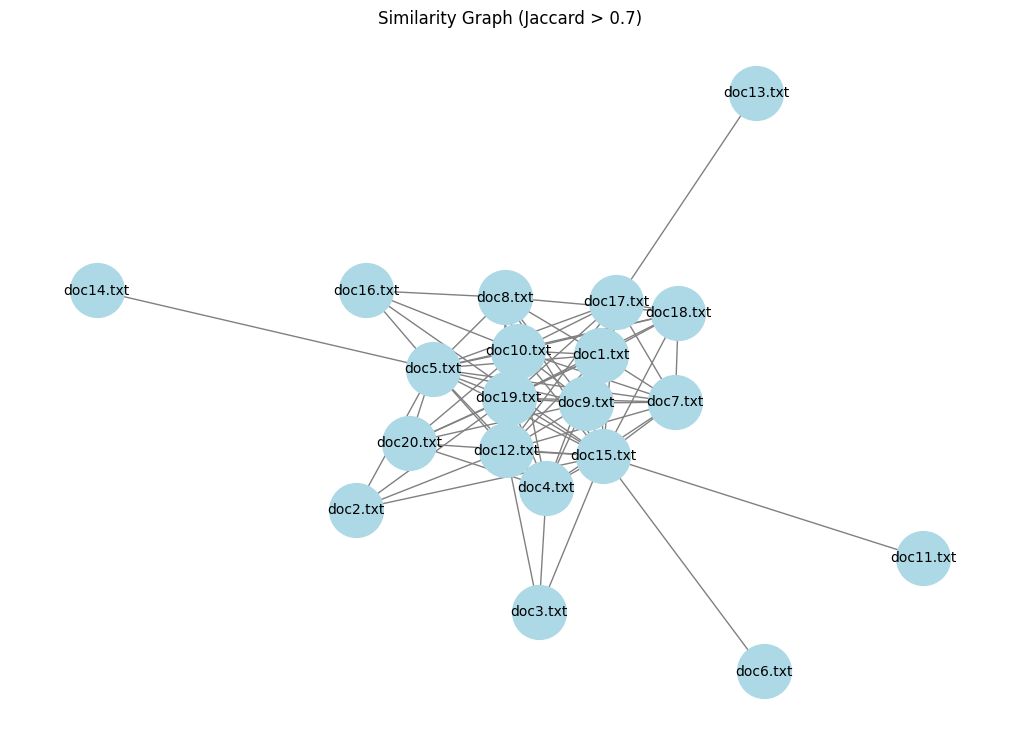

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
for file1, file2, sim in similarities:
    if sim > 0.7:
        G.add_edge(file1, file2, weight=sim)

plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=1500, font_size=10)
plt.title("Similarity Graph (Jaccard > 0.7)")
plt.show()


Q6

In [25]:
from google.colab import files
import zipfile
import os
uploaded = files.upload()
zip_path = next(iter(uploaded))
extract_path = "paragraphs"
os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


Saving paragraphs_500.zip to paragraphs_500.zip


In [27]:
from datasketch import MinHash
import re

def get_3grams(text):
    tokens = re.findall(r'\w+', text.lower())
    return [f"{tokens[i]}_{tokens[i+1]}_{tokens[i+2]}" for i in range(len(tokens) - 2)]

def minhash_signature(three_grams, num_perm=50):
    mh = MinHash(num_perm=num_perm)
    for gram in three_grams:
        mh.update(gram.encode('utf-8'))
    return mh
minhash_dict = {}
for filename in sorted(os.listdir(extract_path)):
    with open(os.path.join(extract_path, filename), 'r') as f:
        text = f.read()
    grams = get_3grams(text)
    mh = minhash_signature(grams)
    minhash_dict[filename] = mh


In [30]:
from datasketch import MinHashLSH
lsh = MinHashLSH(threshold=0.8, num_perm=50)
for filename, mh in minhash_dict.items():
    lsh.insert(filename, mh)
similar_pairs_lsh = []

for filename, mh in minhash_dict.items():
    candidates = lsh.query(mh)
    for candidate in candidates:
        if filename < candidate:
            sim = mh.jaccard(minhash_dict[candidate])
            similar_pairs_lsh.append((filename, candidate, sim))
mh = minhash_dict["para1.txt"]
print(mh.hashvalues)


[535519484  88331308 144365607 118654862 110181513  40111973  57717511
 484168606  82054550 154884013  63805448  93343613 528708240  64299772
  81054861 479145984 303790390  43782882   8058578 172685373  49231444
 503540346  35889713 220489402 233140146  89895041   5286644 396505496
  77032627  47050496 174569848 237214158 103447447  40120593  23900302
  47945315 112284339 321267598 139579906 272017128 210650335 269176476
  18388331 331380885 604329462  94356929 301700509  65401486 160480991
  27257111]


In [31]:
print(f"Number of pairs found by LSH: {len(similar_pairs_lsh)}")
similar_pairs_lsh[:10]

Number of pairs found by LSH: 40720


[('para1.txt', 'para272.txt', 0.8),
 ('para1.txt', 'para217.txt', 0.84),
 ('para1.txt', 'para313.txt', 0.82),
 ('para1.txt', 'para282.txt', 0.84),
 ('para1.txt', 'para292.txt', 0.86),
 ('para1.txt', 'para463.txt', 0.78),
 ('para1.txt', 'para286.txt', 0.84),
 ('para1.txt', 'para333.txt', 0.86),
 ('para1.txt', 'para452.txt', 0.78),
 ('para1.txt', 'para400.txt', 0.78)]

In [32]:
import time
from itertools import combinations
start_time = time.time()
similar_pairs_brute = []
for file1, file2 in combinations(minhash_dict.keys(), 2):
    mh1 = minhash_dict[file1]
    mh2 = minhash_dict[file2]
    sim = mh1.jaccard(mh2)
    if sim >= 0.8:
        similar_pairs_brute.append((file1, file2, sim))

end_time = time.time()
brute_time = end_time - start_time

print(f"Number of pairs found by brute-force: {len(similar_pairs_brute)}")
print(f"Brute-force execution time: {brute_time:.2f} seconds")


Number of pairs found by brute-force: 57833
Brute-force execution time: 0.27 seconds
